<a href="https://colab.research.google.com/github/lorischl-otter/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Imports
import pandas as pd
import numpy as np

In [4]:
# Calculate mean
mean = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7
mean

3052.714285714286

In [12]:
# Calculate variance
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def variance(list):
  ''' 
  computes the sample variance of a given list
  when mean already computed
  '''
  sum_squares = 0
  for x in sales:
    sum_squares += ((x - mean)**2)
  return sum_squares / (len(list)-1)

variance(sales)

214387.90476190473

In [17]:
# Checking work for mean and variance
print(np.mean(sales))
print(np.var(sales, ddof=1))

3052.714285714286
214387.90476190473


In [20]:
# Calculate standard deviation
std = np.sqrt(variance(sales))
std

463.0204150595357

In [21]:
# Checking work for standard deviation
np.std(sales, ddof=1)

463.0204150595357

In [47]:
# Completing function to include standard deviation (given the mean)
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def variance_std(list):
  ''' 
  computes the sample mean, variance, and standard deviation of a list
  '''
  sample_mean = (sum(list)/len(list))
  print("Mean:", sample_mean)
  sum_squares = 0
  for x in list:
    sum_squares += ((x - sample_mean)**2)
  variance = (sum_squares / (len(list)-1))
  print("Variance:", variance)
  print("Standard Deviation:", np.sqrt(variance))
variance_std(sales)

Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [52]:
# Creating DataFrame
customers = [127, 80, 105, 92, 120, 115, 93]
compiled_data = {"customers": customers, "sales": sales}
df = pd.DataFrame(compiled_data)
df.head()

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700


In [34]:
# Find covariance between sales and customers
covariance_matrix = df.cov()
covariance_matrix
# Covariance is 7604.36, and thus, a Large Positive Covariance

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


In [32]:
# Just realized I didn't have to convert to df! Here's the simpler function:
np.cov(customers, sales)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [48]:
# Using my previous function to find standard deviation of customers
variance_std(customers)

Mean: 104.57142857142857
Variance: 290.95238095238096
Standard Deviation: 17.057326313123664


In [49]:
# Calculating correlation coefficient
(covariance_matrix.iloc[0,1])/(17.0573*463.0204)

0.9628354944284551

In [43]:
# Testing correlation coefficient work
df.corr()

# Correlation coefficient = .9628

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [51]:
# Import data into data frame
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [58]:
# Create variance-covariance matrix for numeric columns in Titanic dataset
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [59]:
# Create correlation matrix for numeric columns in Titanic dataset
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular.

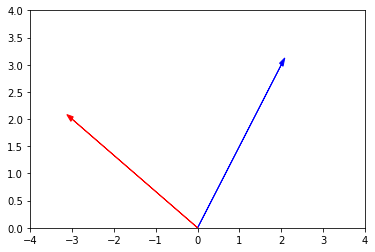

In [105]:
# Creating two orthogonal vectors
blue = [2,3]
red = [-3,2]

# Plotting vectors
import matplotlib.pyplot as plt

plt.arrow(0, 0, blue[0], blue[1], color='blue', head_width=.1)
plt.arrow(0, 0, red[0], red[1], color ='red', head_width=.1)
plt.xlim(-4, 4)
plt.ylim(0, 4)
plt.show()

In [66]:
np.dot(red,blue)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [69]:
# Calculating dot product of a & b to determine orthogonality
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

# A and B are not orthogonal because the dot product does not equal zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [80]:
# Input c
c = np.array([2, -15, 6, 20])

# Calculate the square of the norm of c
(np.linalg.norm(c))**2

665.0

In [81]:
# Calculate the dot product of c
np.dot(c,c)

665

In [103]:
# Multiply the transpose of c by c
np.multiply(c.reshape(-1,1),c)

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

I believe the commonality is that all of these quantities involve squaring each value of the vector, and if you sum all the values of the main diagonal of the final matrix, I you also get the identical value of 665. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix}$

$e = 2 \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [91]:
# Calculating norm of f
f = [4, 12, 11, 9 ,2]

np.linalg.norm(f)

19.131126469708992

In [94]:
# Turning f into a nunit vector by dividing element-wise by the norm
np.divide(f,19.1311264)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454168])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

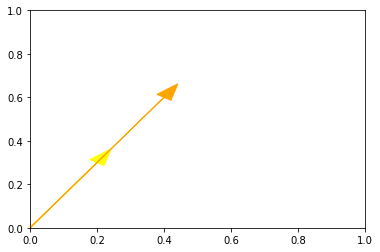

In [97]:
# Plotting two linearly dependent vectors
yellow = [.2, .3]
orange = [.4, .6]

plt.arrow(0, 0, yellow[0], yellow[1], color='yellow', head_width=.05)
plt.arrow(0, 0, orange[0], orange[1], color='orange', head_width=.05)
plt.show()

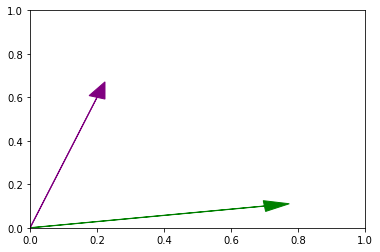

In [98]:
# Plotting two linearly independent vectors
green = [.7, .1]
purple = [.2, .6]

plt.arrow(0, 0, green[0], green[1], color='green', head_width=.05)
plt.arrow(0, 0, purple[0], purple[1], color='purple', head_width=.05)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span of these two vectors is all of 1-dimensional space, or a single line,
# since the vectors are dependent

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# The span of these three vectors is all of 3-dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



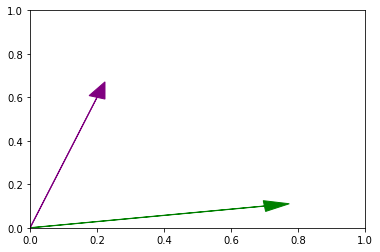

In [99]:
# Repeating the same plot from above, which span all the real numbers in 
# 2-dimensional space, and thus form a basis for R^2

plt.arrow(0, 0, green[0], green[1], color='green', head_width=.05)
plt.arrow(0, 0, purple[0], purple[1], color='purple', head_width=.05)
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis means spanning an entire vector space. The two vectors above are liniearly independent and span the entire vector space of real numbers in 2-dimensional space, and thus form a basis for $\mathbb{R}^2$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [100]:
# Calculating Rank of P
P = [[1,2,3],
     [-1,0,7],
     [4,8,2]]

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us what the span is of the vectors that compose the matrix.

# Linear Projections (Stretch Goal)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

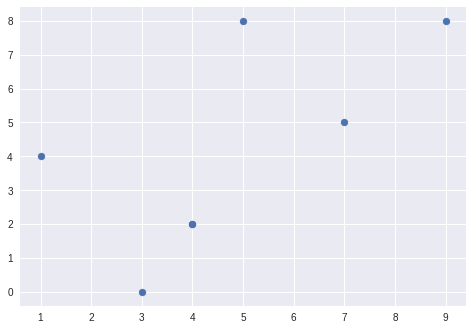

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()